In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re

In [7]:
print(os.getcwd())

/opt/ml/project/level2-klue-nlp-06/data analysis


In [3]:
train_data = pd.read_csv('../../dataset/train/train.csv')
test_data = pd.read_csv('../../dataset/test/test_data.csv')

Data 설명

In [4]:
label_count = train_data['label'].value_counts().sort_index()
txt_file_path = 'data_description.txt'

# 파일 읽기
with open(txt_file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# 데이터 구성
data_description = {'Relation_Class': [], 'Description': [], 'Count': []}

for line in lines:
    line = line.strip()
    if line:
        relation_class, description = map(str.strip, line.split('\t'))
        data_description['Relation_Class'].append(relation_class)
        data_description['Description'].append(description)
        data_description['Count'].append(label_count[relation_class])

# DataFrame 생성
data_description = pd.DataFrame(data_description)
data_description.head(5)

,Relation_Class,Description,Count
0,no_relation,"No relation in between (esubj, eobj)",9534
1,org:dissolved,The date when the specified organization was d...,66
2,org:founded,The date when the specified organization was f...,450
3,org:place_of_headquarters,The place which the headquarters of the specif...,1195
4,org:alternate_names,Alternative names called instead of the offici...,1320


Label의 특성을 파악하기 쉽게, 다음의 형태로 출력
                         
    Label (개수) : 설명
    {subject_entity : word_entity} 

- Example
    org:member_of (1866)  :  Organizations to which the specified organization belongs
    {'광주FC': '한국프로축구연맹', '제2총군': '일본 제국 육군', '맨체스터 시티 FC': '프리미어리그', '세비야': '스페인', '대원방송': '대원미디어'}

In [145]:
label_list = train_data['label'].unique()

for label in label_list:
    print(label + ' (' + str(data_description[data_description['Relation_Class']==label]['Count'].iloc[0]) + ') ' + ' :  ' + data_description[data_description['Relation_Class']==label]['Description'].iloc[0])
    
    df = train_data[train_data['label'] == label].head()
    
    output = {}
    for subject_entity, object_entity in zip(df['subject_entity'], df['object_entity']):
        result = re.search(r"'word':\s*'([^']*)'", subject_entity)
        subject_word = result.group(1)
        
        result = re.search(r"'word':\s*'([^']*)'", object_entity)
        object_word = result.group(1)
        
        output[subject_word] = object_word
    print(output)
    print()


no_relation (9534)  :  No relation in between (esubj, eobj)
{'비틀즈': '조지 해리슨', '민주평화당': '대안신당', '요미우리 자이언츠': '1967', 'AC 밀란': '1989', '미켈란젤로': '르네상스'}

org:member_of (1866)  :  Organizations to which the specified organization belongs
{'광주FC': '한국프로축구연맹', '제2총군': '일본 제국 육군', '맨체스터 시티 FC': '프리미어리그', '세비야': '스페인', '대원방송': '대원미디어'}

org:top_members/employees (4284)  :  The representative(s) or members of the specified organization
{'아성다이소': '박정부', '필라델피아 필리스': '박찬호', '곡성군': '유근기', 'HB엔터테인먼트': '문보미', '공무원연금공단': '정남준'}

org:alternate_names (1320)  :  Alternative names called instead of the official name to refer to the specified organization
{'북대서양 조약 기구': 'NATO', '유럽 축구 연맹': 'UEFA', '미국의 소리': 'Voice of America', 'Facebook': '페이스북', 'LG전자': '금성사'}

per:date_of_birth (1130)  :  The date when the specified person was born
{'박용오': '1937년 4월 29일', '제임스 클라크 로스': '1800년 ~ 1862년', '김동성': '1980년 2월 9일', '한상길': '1987년 9월 5일', '안효섭': '1995년 4월 17일'}

org:place_of_headquarters (1195)  :  The place whic

In [174]:
def show_particular_label(label, start, end):
    print(label + ' (' + str(data_description[data_description['Relation_Class']==label]['Count'].iloc[0]) + ') ' + ' :  ' + data_description[data_description['Relation_Class']==label]['Description'].iloc[0])
    print()
    df = train_data[train_data['label'] == label].iloc[start:end+1,:]
        
    for i, (subject_entity, object_entity) in enumerate(zip(df['subject_entity'], df['object_entity'])):
        result = re.search(r"'word':\s*'([^']*)'", subject_entity)
        subject_word = result.group(1)
        
        result = re.search(r"'word':\s*'([^']*)'", object_entity)
        object_word = result.group(1)
        
        print('['+str(start+i)+']'+'{' + '{} : {}'.format(subject_word, object_word) + '}')
        print(df.iloc[i]['sentence'])
        print()
    

show_particular_label('no_relation',2,6)

no_relation (9534)  :  No relation in between (esubj, eobj)

[2]{요미우리 자이언츠 : 1967}
1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8번으로 배정되었다.

[3]{AC 밀란 : 1989}
그에 따라 나폴리와 계약을 연장한 마라도나는 1989년 팀을 UEFA컵 정상으로 인도했으며 이듬해에는 유럽 챔피언 AC 밀란을 상대로 승리를 거두고 다시 한 번 세리에A에서 정상에 등극했다.

[4]{미켈란젤로 : 르네상스}
조토 디 본도네, 마사초, 피에로 델라 프란체스카, 도메니코 기를란다요, 페루지노, 미켈란젤로, 라파엘로, 보티첼리, 레오나르도 다빈치, 티치아노 등으로 대표되는 이탈리아 르네상스 회화는 당대와 그 이후의 시기 유럽 전체에 영향을 주었다.

[5]{이정미 : 정의당}
이정미 대표도 이날 기자회견에 앞서 한 라디오 방송에 출연 "정개특위를 한국당에 내주는 건 어떤 일이 있어도 안 된다"며 "지금 한국당을 어르고 구슬리는 게 민주당에 득이 된다고 생각할지 모르겠지만 정부 여당의 개혁 정책에 가장 힘을 실어줬던 정의당과 야3당의 개혁 공조가 어그러지는 상황이 될 것"이라고 지적했다.

[6]{한국수자원공사 : 환경부}
이번 포럼은 제주개발공사와 유네스코 아시아-태평양 본부, 한국지질자원연구원이 공동 주최하고 유네스코 파리본부, 제주특자치도, 환경부, 한국수자원공사, 한국건설기술연구원 등이 후원한다.



In [31]:
# 출력 옵션 변경: 최대 행 및 열 표시 설정
pd.set_option("display.max_rows", None)  # 모든 행을 표시하려면 None을 사용할 수 있습니다.
pd.set_option("display.max_columns", None)  # 모든 열을 표시하려면 None을 사용할 수 있습니다.
pd.set_option("display.max_colwidth", None)

print(train_data.head())

pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")
pd.reset_option("display.max_colwidth")

   id  \
0   0   
1   1   
2   2   
3   3   
4   4   

                                                                                              sentence  \
0                                          〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.   
1                                               호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으로 재탄생한다.   
2  K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터 관중 유치 성과와 마케팅 성과를 인정받아 ‘풀 스타디움상’과 ‘플러스 스타디움상’을 수상했다.   
3                       균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪고 있는 대구광역시에 행복박스를 전달했다고 10일 밝혔다.   
4                                             1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8번으로 배정되었다.   

                                                         subject_entity  \
0        {'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}   
1      {'word': '민주평화당', 'start_idx': 19, 'end_idx': 23, 'type': 'ORG'}   
2       {'word': '광주FC', 'start_idx': 21, 'end_idx': 24, 'type': 'ORG'}   
3      {

In [74]:
train_data['subject_entity'].head()

0          {'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}
1        {'word': '민주평화당', 'start_idx': 19, 'end_idx': 23, 'type': 'ORG'}
2         {'word': '광주FC', 'start_idx': 21, 'end_idx': 24, 'type': 'ORG'}
3        {'word': '아성다이소', 'start_idx': 13, 'end_idx': 17, 'type': 'ORG'}
4    {'word': '요미우리 자이언츠', 'start_idx': 22, 'end_idx': 30, 'type': 'ORG'}
Name: subject_entity, dtype: object

In [32]:
print(train_data.columns)

Index(['id', 'sentence', 'subject_entity', 'object_entity', 'label', 'source'], dtype='object')


In [43]:
print(len(train_data['label'].value_counts().sort_index()))
print((train_data['label'].value_counts().sort_index()))

30
no_relation                            9534
org:alternate_names                    1320
org:dissolved                            66
org:founded                             450
org:founded_by                          155
org:member_of                          1866
org:members                             420
org:number_of_employees/members          48
org:place_of_headquarters              1195
org:political/religious_affiliation      98
org:product                             380
org:top_members/employees              4284
per:alternate_names                    1001
per:children                            304
per:colleagues                          534
per:date_of_birth                      1130
per:date_of_death                       418
per:employee_of                        3573
per:origin                             1234
per:other_family                        190
per:parents                             520
per:place_of_birth                      166
per:place_of_death           

전체 라벨의 분포

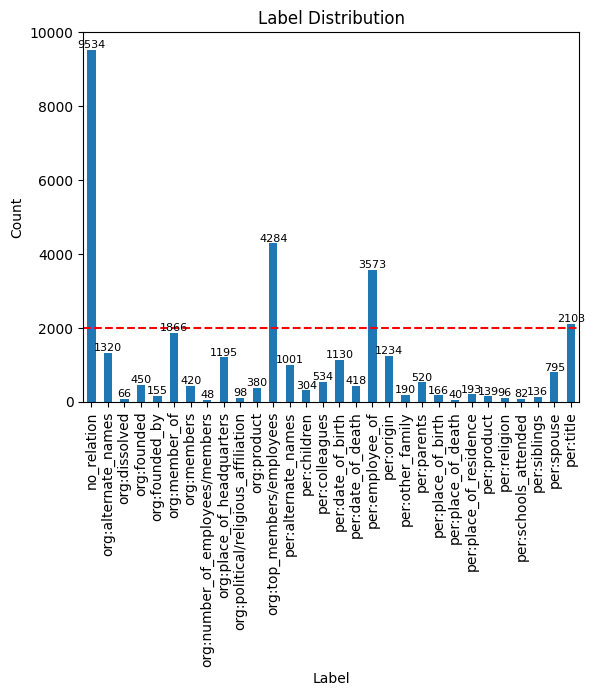

In [65]:
train_data['label'].value_counts().sort_index().plot(kind='bar')

for i, value in enumerate(train_data['label'].value_counts().sort_index()):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=8)

plt.axhline(y=2000, color='red', linestyle='--')

plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

plt.show()

2000개 이상인 label을 제외한 label 분포

In [ ]:
label_counts = train_data['label'].value_counts().sort_index()

# 값이 2000 이상인 label 목록 추출
labels_over_2000 = label_counts[label_counts >= 2000].index.tolist()

print("값이 2000 이상인 label 목록:", labels_over_2000)

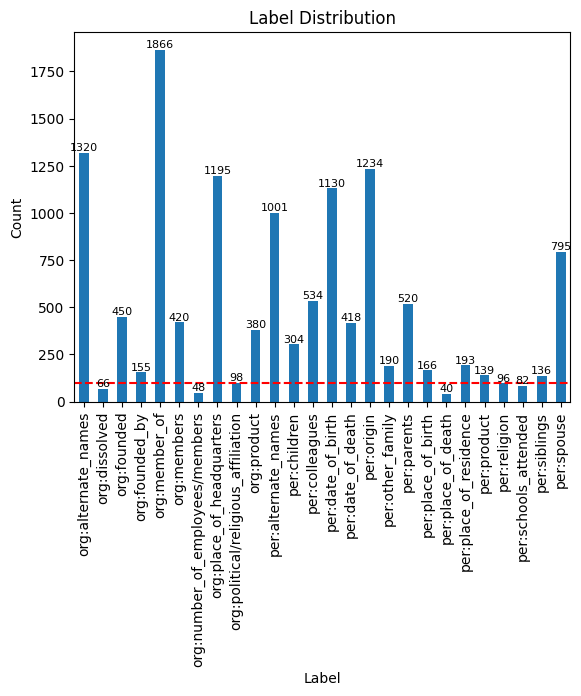

In [66]:
labels_to_exclude = labels_over_2000

train_data[~train_data['label'].isin(labels_to_exclude)]['label'].value_counts().sort_index().plot(kind='bar')

for i, value in enumerate(train_data[~train_data['label'].isin(labels_to_exclude)]['label'].value_counts().sort_index()):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom',fontsize=8)

plt.axhline(y=100, color='red', linestyle='--')

plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

plt.show()

100개 이하인 label

In [67]:
label_counts = train_data['label'].value_counts().sort_index()

labels_under_100 = label_counts[label_counts <= 100].index.tolist()

print("값이 100 이하인 label 목록:", labels_under_100)

값이 100 이하인 label 목록: ['org:dissolved', 'org:number_of_employees/members', 'org:political/religious_affiliation', 'per:place_of_death', 'per:religion', 'per:schools_attended']


In [98]:
# 출력 옵션 변경: 최대 행 및 열 표시 설정
pd.set_option("display.max_rows", None)  # 모든 행을 표시하려면 None을 사용할 수 있습니다.
pd.set_option("display.max_columns", None)  # 모든 열을 표시하려면 None을 사용할 수 있습니다.
pd.set_option("display.max_colwidth", None)
for label in labels_under_100:
    print(label + '의 정보를 보여드립니다')
    
    df = train_data[train_data['label'] == label].head()
    
    output = {}
    for subject_entity, object_entity in zip(df['subject_entity'], df['object_entity']):
        result = re.search(r"'word':\s*'([^']*)'", subject_entity)
        subject_word = result.group(1)
        
        result = re.search(r"'word':\s*'([^']*)'", object_entity)
        object_word = result.group(1)
        
        output[subject_word] = object_word
    print(output)
    print()
    
    

pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")
pd.reset_option("display.max_colwidth")

org:dissolved의 정보를 보여드립니다
{'대성여자중학교': '1959년', '제주교육대학교': '2008년 3월 1일', '진나라': '기원전 206년', '충남 일화 천마': '2012년', '로마제국': '395년'}

org:number_of_employees/members의 정보를 보여드립니다
{'독일 연방군': '49만 5,000명', '군사고문단': '500명', '순천시': '281534명', '소녀시대': '9명', '광주 서구': '18개'}

org:political/religious_affiliation의 정보를 보여드립니다
{'몽골 인민 공화국': '공산주의', '교황령': '가톨릭', '폴란드 인민 공화국': '공산주의', '노바야 가제타': '자유주의'}

per:place_of_death의 정보를 보여드립니다
{'최진영': '서울특별시 강남구', '막시밀리아노 1세': '멕시코 케레타로', '우범선': '일본 히로시마현 구레', '마리 드 메디시스': '쾰른', '김립': '상하이'}

per:religion의 정보를 보여드립니다
{'라인홀트 니부어': '개신교', '사무드라굽타': '힌두교', '손병희': '천도교', '구카이': '진언종', '전덕기': '감리교'}

per:schools_attended의 정보를 보여드립니다
{'문성민': '경기대', '김기표': '경성대', '쟝쩐위': '중앙희극학원', '오선우': '인하대', '장효조': '한양대'}

